### 선형회귀
- 회귀분석의 목적
    - 독립변수로 종속변수를 예측하는것
    - 종속변수는 수치형 데이터

In [1]:
# 샘플 데이터
datas = np.array([[1, 3], [2, 5], [3, 7]])
datas

array([[1, 3],
       [2, 5],
       [3, 7]])

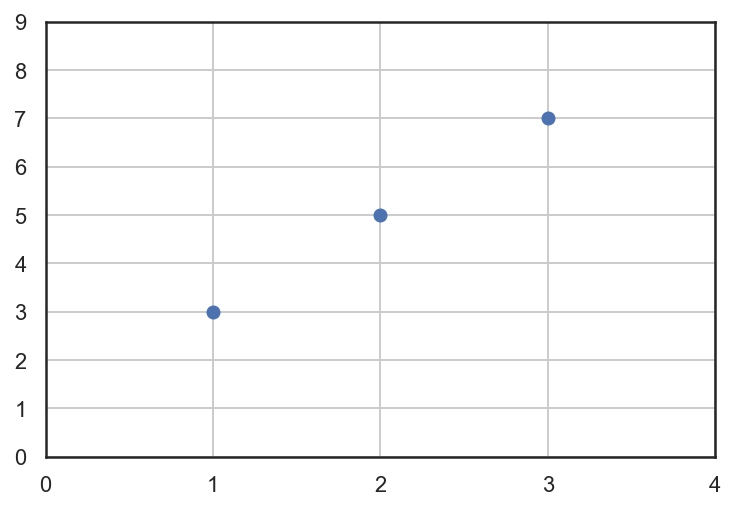

In [2]:
# 그래프
plt.scatter(datas[:, 0], datas[:, 1])
plt.xticks(range(0, 5))
plt.yticks(range(0, 10))
plt.grid(True)
plt.show()

#### 방정식
- 샘플 데이터를 직선 방정식으로 표현
    - 일반적인 우리가 배운 수학에서는 방정식으로 해결
    - $y = ax + b$ 
        - 데이터 : [1, 3], [2, 5], [3, 7]
        - 계산과정
            - $3 = 1a + b$
            - $5 = 2a + b$
            - $(3 = 1a + b) - (5 = 2a + b) => (-2 = -1a)$ -> a = 2
            - $3 = a(a=2) + b$ -> b = 1
        - 추세선 : $y = 2x + 1$ 

#### 선형대수
- 컴퓨터는 위의 방정식을 선형대수로 계산
- 코드도 선형대수로 변환해서 작성

$$
\begin{bmatrix}
1 & 1\\
2 & 1\\
\end{bmatrix}
\begin{bmatrix}
a\\
b\\
\end{bmatrix}
= 
\begin{bmatrix}
3\\
5\\
\end{bmatrix}
$$

$$
\begin{bmatrix}
a\\
b\\
\end{bmatrix}
= 
\begin{bmatrix}
1 & 1\\
2 & 1\\
\end{bmatrix}
^{-1}
\begin{bmatrix}
3\\
5\\
\end{bmatrix}
$$

- 역행렬

$$
\begin{bmatrix}
a & b\\
c & d\\
\end{bmatrix}
^{-1}
=
\frac{1}{ad-bc}
\begin{bmatrix}
d & -b\\
-c & a\\
\end{bmatrix}
$$

In [3]:
def inverse_matrix(a, b, c, d):
    pnum = 1 / (a * d - b * c)
    tmp_a = a
    a, d = d, tmp_a
    b, c = -b, -c
    return a * pnum, b * pnum, c * pnum, d * pnum

- 역행렬 계산

$$
\begin{bmatrix}
a\\
b\\
\end{bmatrix}
= 
-1
\begin{bmatrix}
1 & -1\\
-2 & 1\\
\end{bmatrix}
\begin{bmatrix}
3\\
5\\
\end{bmatrix}
$$

$$
\begin{bmatrix}
a\\
b\\
\end{bmatrix}
= 
\begin{bmatrix}
-1 & 1\\
2 & -1\\
\end{bmatrix}
\begin{bmatrix}
3\\
5\\
\end{bmatrix}
$$

In [4]:
# 역행렬로 회귀계수 구하는 함수
def dot(a, b, c, d, y0, y1):
    print(a, b, c, d, y0, y1)
    num1 = a * y0 + b * y1
    num2 = c * y0 + d * y1
    return num1, num2

- 최종 a(기울기), b(절편)값 계산

$$ a = (-1 \times 3) + (1 \times 5) $$
$$ b = (-2 \times 3) + (-1 \times 5) $$

In [5]:
datas

array([[1, 3],
       [2, 5],
       [3, 7]])

In [6]:
# 회귀계수
m1 = (1, 1, 2, 1)
y = (3, 5)
im = inverse_matrix(*m1)
dot(*im, *y)

-1.0 1.0 2.0 -1.0 3 5


(2.0, 1.0)

In [7]:
# 추세선 함수
def pred_func(x):
    return 2 * x + 1

In [8]:
# 예측값
pred_y = [pred_func(data) for data in range(0, 5)]
print(list(range(0, 5)), pred_y)

[0, 1, 2, 3, 4] [1, 3, 5, 7, 9]


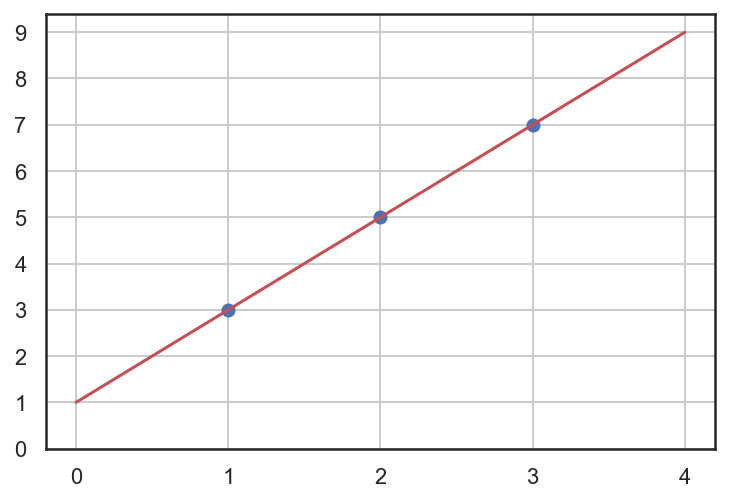

In [9]:
# 그래프
plt.scatter(datas[:, 0], datas[:, 1])
plt.plot(range(0, 5), pred_y, "r-")
plt.xticks(range(0, 5))
plt.yticks(range(0, 10))
plt.grid(True)
plt.show()

#### 패키지 사용

In [10]:
x = np.reshape(datas[:, 0], (-1, 1))
y = np.reshape(datas[:, 1], (-1, 1))

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)

In [12]:
# 절편, 기울기
model.intercept_, model.coef_

(array([1.]), array([[2.]]))

#### 예시

In [13]:
# 2016 - 2017 프리미어 리그 데이터
df = pd.read_csv("datas/premierleague.csv")
df.head(2)

,name,gf,ga,points
0,Manchester City,106,27,100
1,Manchester United,68,28,81


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

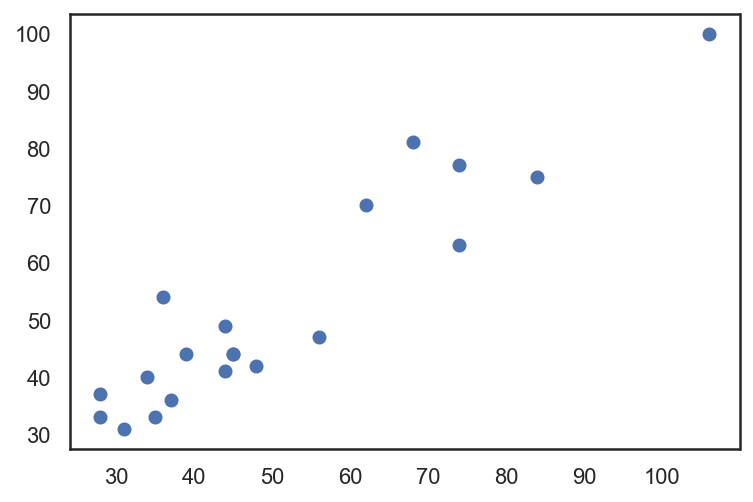

In [15]:
plt.scatter(df["gf"], df["points"])
plt.show()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df[["gf"]], df[["points"]], test_size=0.2, random_state=0)
model = LinearRegression().fit(x_train, y_train)
model.score(x_test, y_test)

0.7596768575816994

In [17]:
pred_y = model.predict(df[["gf"]])

In [18]:
x = df["gf"].min(), df["gf"].max()
y = int(pred_y.min()), int(pred_y.max())
x, y

((28, 106), (34, 96))

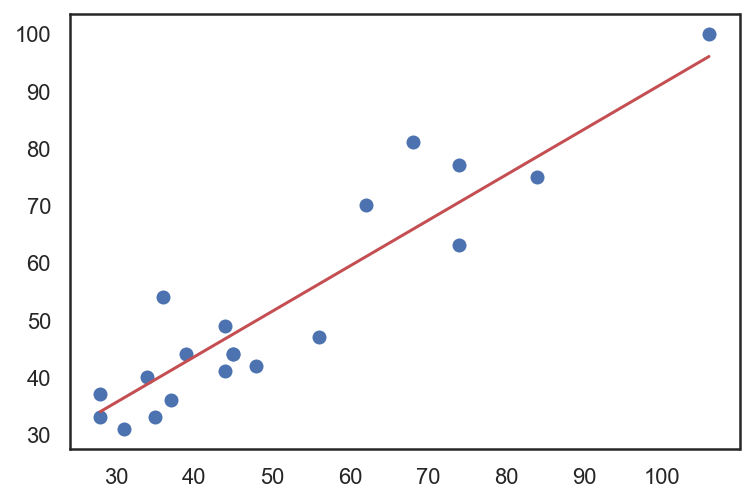

In [19]:
plt.scatter(df["gf"], df["points"])

plt.plot(x, y, "r-")

plt.show()

In [20]:
# 절편, 기울기 : 기본 11.5점, 1골 넣을때마다 0.8점씩 승점 증가
model.intercept_, model.coef_

(array([11.57654237]), array([[0.80166102]]))

In [26]:
# 득점이 80점이면 승점은 76점
goal = 80
np.round(model.predict([[goal]]))

array([[76.]])